---
# Generate new paper figures with modified cohort
L.Richards    
November 2019  
 
---

This is for Mike P. paper submission. Nov 22, 2019

/mnt/work1/users/pughlab/projects/DDX56_scRNA_PearsonLab/Reanalysis_Nov22

---
## 1.0 Subset and reprocess data
---

Using 8 lines from Dirks Lab
> "G523_L", "G566_L", "G583_L", "G800_L", "G637_L", "G729_L", "G564_L", "G549_L"

----
## 2.0 Plot
---

In [7]:
library(ggplot2)
library(gridExtra)
library(ggpubr)

In [11]:
dat <- readRDS("~/Desktop/Samwise/projects/DDX56_scRNA_PearsonLab/Reanalysis_Nov22/DDX56_8lines_metadata.rds")
head(dat)
dim(dat)

,nGene,nUMI,orig.ident,percent.mito,S.Score,G2M.Score,Phase,CC.Difference,tSNE_1,tSNE_2,DDX56,SOX2
G523_L_AAACCTGAGCAATCTC,4854,24382,G523_L,0.05746042,0.24336700,0.25295172,G2M,-0.009584716,6.9901269,3.877440,0.3436880,2.588077
G523_L_AAACCTGAGGCAGTCA,2830,9536,G523_L,0.04089765,0.39718994,0.07052318,S,0.326666755,-0.4577297,4.203093,0.0000000,2.345445
G523_L_AAACCTGAGGCATTGG,2842,9041,G523_L,0.05098993,0.42346341,-0.03806699,S,0.461530407,1.0685812,3.253424,0.0000000,1.166939
G523_L_AAACCTGAGTATTGGA,3476,14377,G523_L,0.05787021,-0.02522093,-0.20010446,G1,0.174883530,3.3575063,-8.969588,0.0000000,2.306798
G523_L_AAACCTGCAATACGCT,3012,10150,G523_L,0.06118227,-0.02927931,-0.12182068,G1,0.092541364,-2.5006288,-5.997016,0.6857306,1.597545
G523_L_AAACCTGCACGGCCAT,2489,7585,G523_L,0.05563612,-0.02294023,0.07607927,G2M,-0.099019493,0.4359519,-5.986677,0.0000000,1.291100


[1] 26675    12

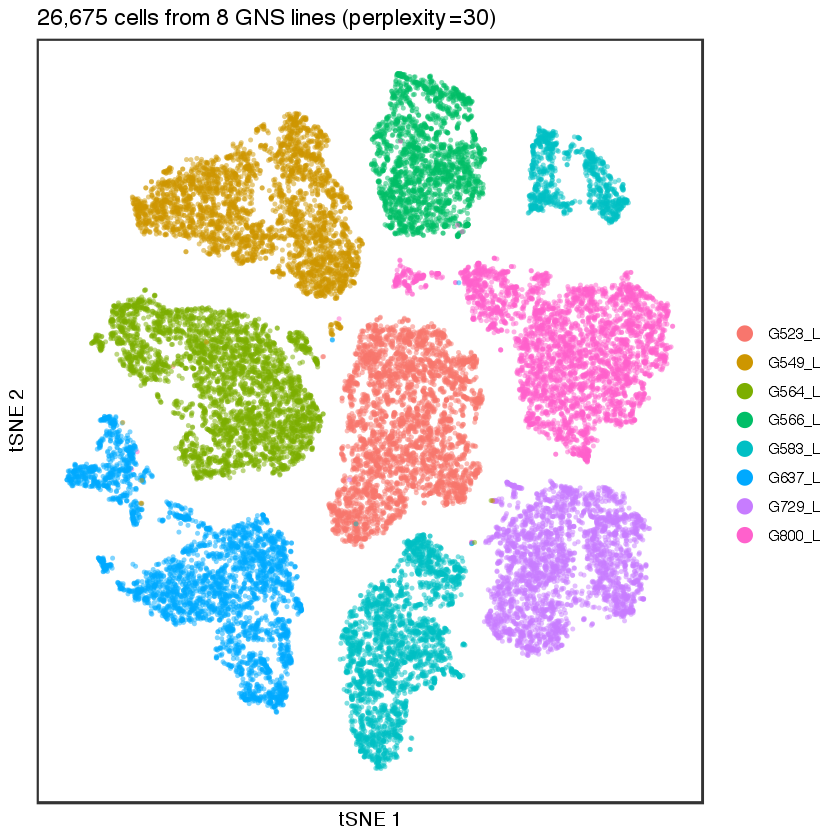

In [25]:
sample_tSNE <- ggplot(dat, aes(x=tSNE_1, y=tSNE_2, color=orig.ident)) + 
                   geom_point(alpha = 0.5, size = 0.8, pch = 16) +  
                   labs(x = "tSNE 1", y = "tSNE 2") +
                   #scale_colour_manual(values = patient.cols) + 
                   theme_bw() + 
                   theme(axis.text.x = element_blank(), axis.text.y = element_blank(), 
                         axis.ticks = element_blank(),
                        panel.border = element_rect(linetype = "solid", fill = NA, size = 1),
                        panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
                        panel.background = element_blank())  +
                    guides(colour = guide_legend(override.aes = list(size=4, alpha = 1))) +
                    ggtitle("26,675 cells from 8 GNS lines (perplexity=30)") + labs(color='') 


sample_tSNE

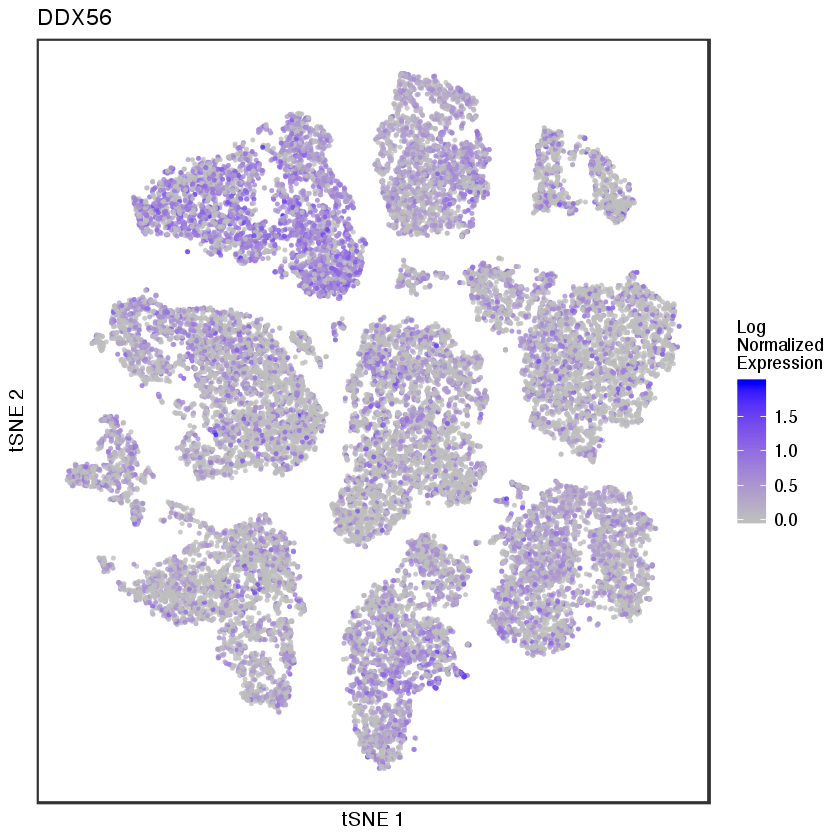

In [73]:
DDX56_tsne <-  ggplot(dat, aes(x=tSNE_1, y=tSNE_2, color=DDX56)) + 
                   geom_point(alpha = 0.8, size = 0.8, pch = 16) +  
                   labs(x = "tSNE 1", y = "tSNE 2") +
                  scale_color_gradient(low="grey", high="blue") +  
                   theme_bw() + 
                   theme(axis.text.x = element_blank(), axis.text.y = element_blank(), 
                         axis.ticks = element_blank(),
                        panel.border = element_rect(linetype = "solid", fill = NA, size = 1),
                        panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
                        panel.background = element_blank())  +
                    #guides(colour = guide_legend(override.aes = list(size=4, alpha = 1))) +
                        labs(color = "Log\nNormalized\nExpression") + ggtitle("DDX56") + 
             theme(legend.text=element_text(size=10), legend.title=element_text(size=10))
                        #theme(legend.position = "none")

DDX56_tsne

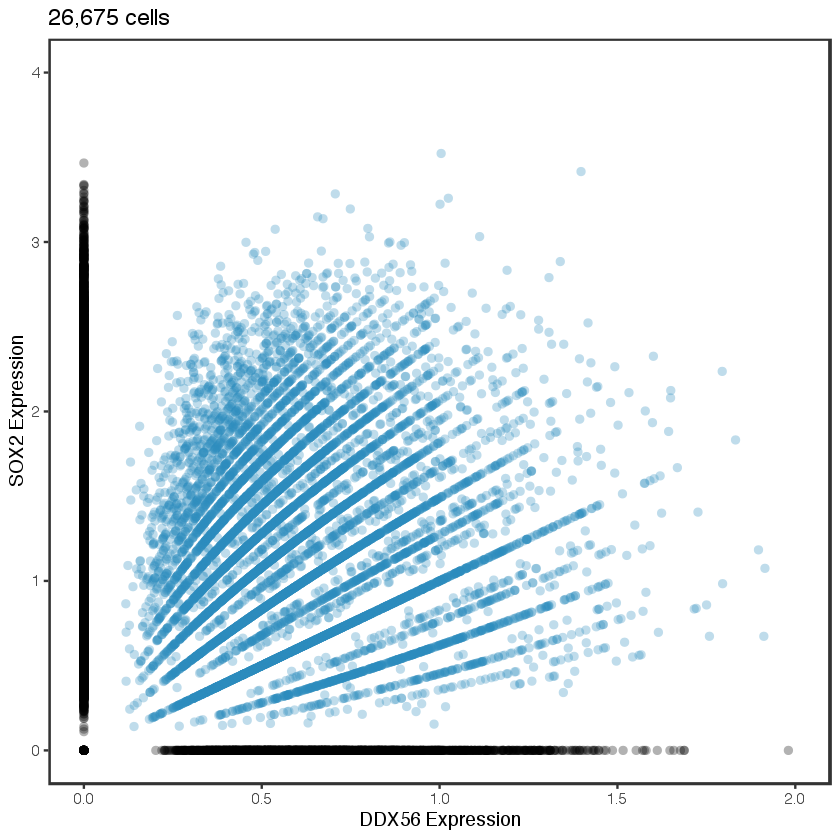

In [62]:
## coexpression plot

DDX56_SOX2 <- ggplot(dat, aes(x=DDX56, y=SOX2, color = ifelse(SOX2 > 0 & DDX56 > 0, '#2b8cbe', 'black'))) +
              geom_point(alpha = 0.3, size = 2, pch = 16) +
                   theme_bw() + 
                   theme(#axis.text.x = element_blank(), axis.text.y = element_blank(), 
                         #axis.ticks = element_blank(),
                        panel.border = element_rect(linetype = "solid", fill = NA, size = 1),
                        panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
                        panel.background = element_blank()) + xlab("DDX56 Expression") + ylab("SOX2 Expression") +
scale_color_identity() + ylim(c(0,4)) + xlim(c(0,2)) + ggtitle("26,675 cells")


DDX56_SOX2 

In [59]:
table(dat$DDX56>0) #11591 cells express DDX56
table(dat$SOX2>0) #21811 cells express SOX2
table(dat$DDX56>0 & dat$SOX2>0) #9564 cells express DDX56 and SOX2
table(dat$DDX56==0 & dat$SOX2==0)


FALSE  TRUE 
15084 11591 


FALSE  TRUE 
 4864 21811 


FALSE  TRUE 
17111  9564 


FALSE  TRUE 
23838  2837 

In [55]:
G523 <- dat[dat$orig.ident == "G523_L", ]
dim(G523)

[1] 3745   12

[1] 3745   12

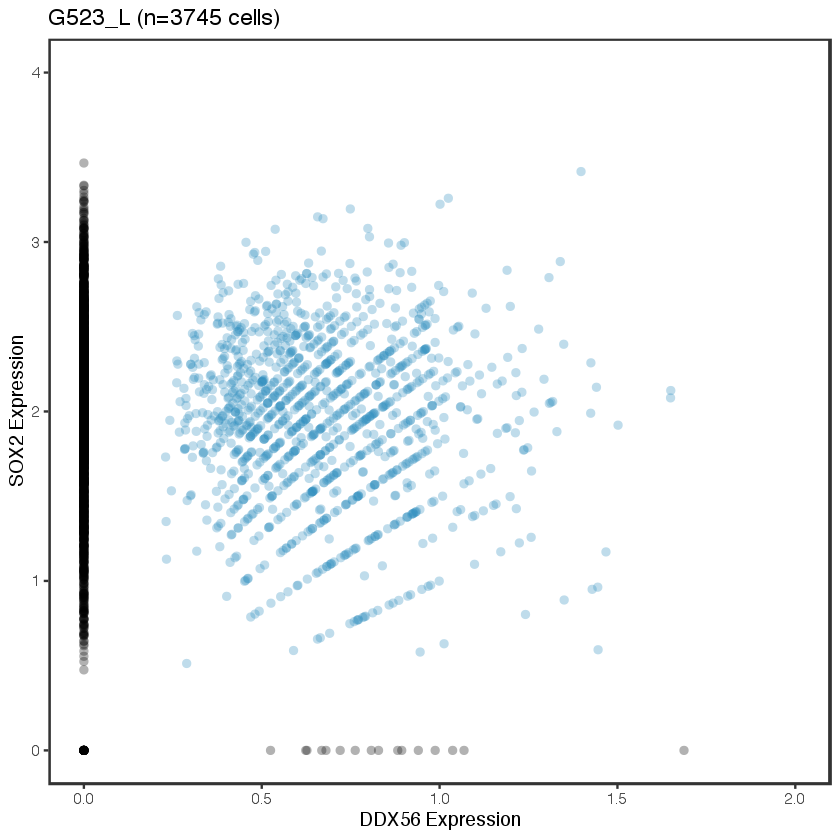

In [56]:
## coexpression plot

G523 <- dat[dat$orig.ident == "G523_L", ]
dim(G523)

G523_DDX56_SOX2 <- ggplot(G523, aes(x=DDX56, y=SOX2, color = ifelse(SOX2 > 0 & DDX56 > 0, '#2b8cbe', 'black'))) +
              geom_point(alpha = 0.3, size = 2, pch = 16) +
                   theme_bw() + 
                   theme(#axis.text.x = element_blank(), axis.text.y = element_blank(), 
                         #axis.ticks = element_blank(),
                        panel.border = element_rect(linetype = "solid", fill = NA, size = 1),
                        panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
                        panel.background = element_blank()) + xlab("DDX56 Expression") + ylab("SOX2 Expression") +
scale_color_identity() + ylim(c(0,4)) + xlim(c(0,2)) + ggtitle("G523_L (n=3745 cells)")


G523_DDX56_SOX2 

In [60]:
table(G523$DDX56>0) #1185 cells express DDX56
table(G523$SOX2>0) #3702 cells express SOX2
table(G523$DDX56>0 & G523$SOX2>0) #1169 cells express DDX56 and SOX2
table(G523$DDX56==0 & G523$SOX2==0)


FALSE  TRUE 
 2560  1185 


FALSE  TRUE 
   43  3702 


FALSE  TRUE 
 2576  1169 


FALSE  TRUE 
 3718    27 

In [74]:
pdf("~/Desktop/DDX56_Figs_Nov222019.pdf", width = 10, height = 5)
grid.arrange(sample_tSNE,
             DDX56_tsne,
             ncol = 2
            )
grid.arrange( DDX56_SOX2,
             
             G523_DDX56_SOX2,
             ncol = 2)
dev.off()

pdf 
  2

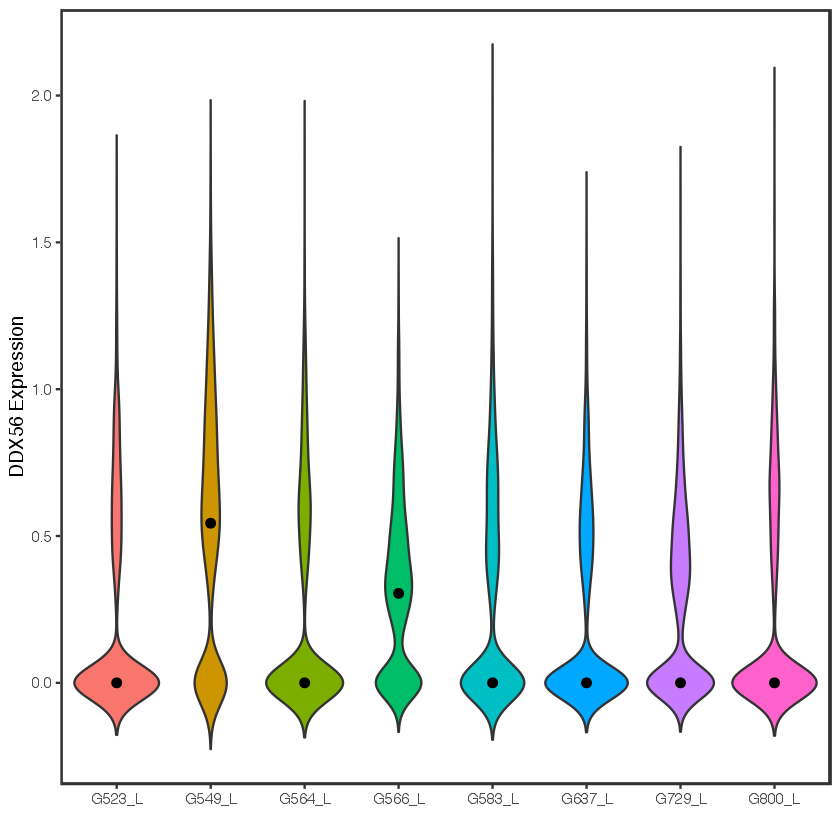

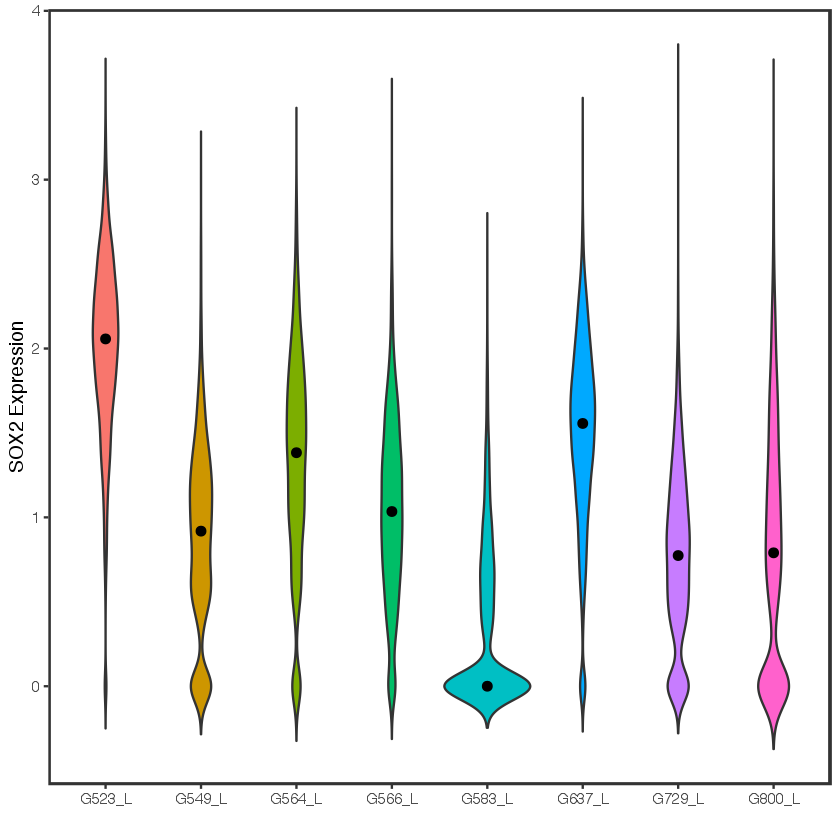

In [89]:
##violin plot of DDX56 and SOX2

p <- ggplot(dat, aes(x=orig.ident, y=DDX56, fill = orig.ident)) + 
    geom_violin(trim=FALSE) + ylab("DDX56 Expression") + xlab("") + 
     stat_summary(fun.y=median, geom="point", size=2, color="black") + theme_bw() + 
                   theme(#axis.text.x = element_blank(), axis.text.y = element_blank(), 
                         #axis.ticks = element_blank(),
                        panel.border = element_rect(linetype = "solid", fill = NA, size = 1),
                        panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
                        panel.background = element_blank()) +  theme(legend.position = "none")


q <- ggplot(dat, aes(x=orig.ident, y=SOX2, fill = orig.ident)) + 
    geom_violin(trim=FALSE) + ylab("SOX2 Expression") + xlab("") + 
     stat_summary(fun.y=median, geom="point", size=2, color="black") + theme_bw() + 
                   theme(#axis.text.x = element_blank(), axis.text.y = element_blank(), 
                         #axis.ticks = element_blank(),
                        panel.border = element_rect(linetype = "solid", fill = NA, size = 1),
                        panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
                        panel.background = element_blank()) +  theme(legend.position = "none")


p

q

In [92]:
pdf("~/Desktop/DDX56_Figs_violin_Nov222019.pdf", width = 8, height = 5)
grid.arrange(p,
             q,
             nrow=2
            )
dev.off()

pdf 
  2